In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.12.0'

In [ ]:
a=tf.constant(4)

In [ ]:
b=tf.Variable(2)

In [ ]:
a

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [ ]:
b

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=2>

In [ ]:
a-b

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [ ]:
c=a+b

In [ ]:
b=b+2

In [ ]:
b

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [ ]:
b=tf.Variable(2)

In [ ]:
b

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=2>

In [ ]:
b.assign(10)

<tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=10>

In [ ]:
b

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=10>

In [ ]:
b.assign_add(2)

<tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=12>

In [ ]:
b.assign_sub(4)

<tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=8>

In [ ]:
b

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=8>

In [ ]:
a.numpy(),b.numpy()

(4, 8)

In [ ]:
a=tf.constant([1,2,3,4,5,6],shape=[2,3])

In [ ]:
a

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [ ]:
b=tf.constant([7,8,9,10,11,12],shape=[3,2])

In [ ]:
b

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 7,  8],
       [ 9, 10],
       [11, 12]], dtype=int32)>

In [ ]:
a@b

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 58,  64],
       [139, 154]], dtype=int32)>

In [ ]:
tf.matmul(a,b)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 58,  64],
       [139, 154]], dtype=int32)>

In [ ]:
b=tf.constant([7,8,9,10,11,12],shape=[2,3])

In [ ]:
a@b

InvalidArgumentError: ignored

In [ ]:
tf.matmul(a,b)

InvalidArgumentError: ignored

In [ ]:
b.numpy().T

array([[ 7, 10],
       [ 8, 11],
       [ 9, 12]], dtype=int32)

In [ ]:
a@b.numpy().T

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 50,  68],
       [122, 167]], dtype=int32)>

In [ ]:
a@tf.linalg.matrix_transpose(b)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 50,  68],
       [122, 167]], dtype=int32)>

In [ ]:
tf.matmul(a,b,transpose_b=True)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 50,  68],
       [122, 167]], dtype=int32)>

In [ ]:
tf.linalg.inv(tf.constant([2,14,35,9],shape=[2,2],dtype='float32'))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-0.0190678 ,  0.02966102],
       [ 0.07415254, -0.00423729]], dtype=float32)>

#Gradients in TensorFlow

In [ ]:
def f(x):
  return x**2+2*x+tf.math.cos(x)

In [ ]:
f(1.0)

<tf.Tensor: shape=(), dtype=float32, numpy=3.5403023>

In [ ]:
x=tf.Variable(0,dtype='float32')

In [ ]:
with tf.GradientTape() as g:
  y=f(x)

In [ ]:
a=g.gradient(y,x) # can only run once

RuntimeError: ignored

In [ ]:
print(a)

tf.Tensor(2.0, shape=(), dtype=float32)


In [ ]:
x=tf.Variable(0,dtype='float32') #created a variable x
x_vals=[]
f_x=[]
df_dx=[]

for i in range(100):
  with tf.GradientTape() as g:
    y=f(x)
  x.assign_add(0.5)  # updating x on which we have to calculate derivative
  x_vals.append(x.numpy()) # x values
  f_x.append(f(x).numpy()) # f(x) values
  df_dx.append(g.gradient(y,x).numpy()) # derivative values

In [ ]:
import seaborn as sns
%matplotlib inline

In [ ]:
import pandas as pd

In [ ]:
data=pd.DataFrame({'x_vals':x_vals,'f':f_x,'grads':df_dx})

<Axes: xlabel='x_vals', ylabel='f'>

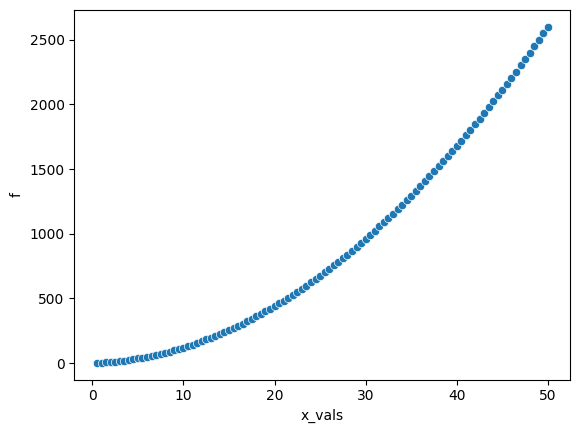

In [ ]:
sns.scatterplot(data=data,x=data['x_vals'],y=data['f'])

<Axes: xlabel='x_vals', ylabel='grads'>

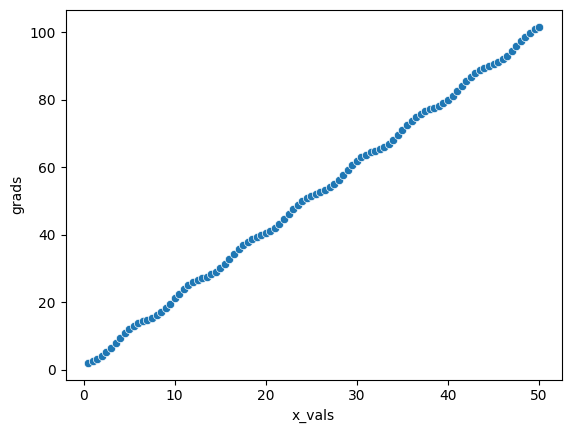

In [ ]:
sns.scatterplot(data=data,x=data['x_vals'],y=data['grads'])

# Simple Linear Regression with tensorflow gradient tape

In [ ]:
import numpy as np

In [ ]:
x1=np.random.randint(1,30,200000)
x2=np.random.randint(1,30,200000)
x=pd.DataFrame({'x1':x1,'x2':x2})
y=4+2*x1+3*x2+3*np.random.random(200000)

In [ ]:
x.shape

(200000, 2)

In [ ]:
class preds:
  def __init__(self):
    self.w1=tf.Variable(0.0)
    self.w2=tf.Variable(0.0)
    self.b=tf.Variable(0.0)

  def __call__(self,x):  # __call__() converts python objects into callable
    result=self.w1*x.iloc[:,0]+self.w2*x.iloc[:,1]+self.b
    return result

In [ ]:
model=preds()

In [ ]:
model(x).numpy()

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [ ]:
def loss(predicted_y,target_y):
  return tf.reduce_mean(tf.square(predicted_y-target_y))

In [ ]:
def train(model,inputs,outputs,learning_rate):

  with tf.GradientTape() as t:
    current_loss=loss(model(inputs),outputs)

  dw1,dw2,db=t.gradient(current_loss,[model.w1,model.w2,model.b])

  model.w1.assign_sub(learning_rate*dw1)
  model.w2.assign_sub(learning_rate*dw1)
  model.b.assign_sub(learning_rate*db*20)

In [ ]:
model=preds()

w1s,w2s,bs=[],[],[]

steps=range(500)

for step in steps:

  w1s.append(model.w1.numpy())
  w2s.append(model.w2.numpy())
  bs.append(model.b.numpy())

  rand_ind=np.random.choice(range(x.shape[0]),100)
  outputs=y[rand_ind]
  inputs=x.iloc[rand_ind,:]

  current_loss=loss(model(inputs),outputs)

  train(model,inputs,outputs,learning_rate=0.0001)

  print(f'Epoch {step}: W1={w2s[-1]} b={bs[-1]}, loss={current_loss}')

Epoch 0: W1=0.0 b=0.0, loss=7585.5556640625
Epoch 1: W1=0.28051406145095825 b=0.32688236236572266, loss=5689.7138671875
Epoch 2: W1=0.5109806060791016 b=0.6109398603439331, loss=4804.14013671875
Epoch 3: W1=0.7255638837814331 b=0.8694300651550293, loss=3681.82666015625
Epoch 4: W1=0.8988140225410461 b=1.094435453414917, loss=3525.09228515625
Epoch 5: W1=1.0813876390457153 b=1.3164784908294678, loss=2594.31884765625
Epoch 6: W1=1.251394271850586 b=1.5069775581359863, loss=2347.961181640625
Epoch 7: W1=1.4066507816314697 b=1.6914892196655273, loss=1534.08447265625
Epoch 8: W1=1.51722252368927 b=1.8378099203109741, loss=1253.279541015625
Epoch 9: W1=1.6230436563491821 b=1.969977617263794, loss=1088.419677734375
Epoch 10: W1=1.7265957593917847 b=2.091200113296509, loss=807.691162109375
Epoch 11: W1=1.8106067180633545 b=2.1951682567596436, loss=708.5993041992188
Epoch 12: W1=1.8875706195831299 b=2.2931132316589355, loss=530.97900390625
Epoch 13: W1=1.943467140197754 b=2.377412796020508, los